In [1]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=496717;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=668474;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#164\164]8;;\
                             C:\Users\9509298u\Documents\GitHub\OC_Projects\ocp7-scoring-model-clou                
                             d.                                                                                    
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=670699;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=20035;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=68099;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=411963;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/9509298u/Documents/GitHub/OC_Projects/ocp                           
                             7-scoring-model-cloud/mlruns'                                                         

[05/09/24 08:08:54] INFO     Kedro project ocp7_scoring_model_cloud                                 ]8;id=477113;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=703238;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=735197;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=221883;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=446018;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=249230;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

In [2]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import missingno as msno


In [3]:
dataset_type = "" #change for "_debug" to load the debug dataset

df_train = catalog.load("application_train" + dataset_type)
df_test = catalog.load("application_test" + dataset_type)

[05/09/24 08:09:01] INFO     Loading data from application_train (CSVDataset)...                ]8;id=260609;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=841402;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py#483\483]8;;\

[05/09/24 08:09:03] INFO     Loading data from application_test (CSVDataset)...                 ]8;id=340317;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=376987;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py#483\483]8;;\

In [4]:
invididual_variables = ["DAYS_BIRTH", "CODE_GENDER", "NAME_EDUCATION_TYPE"]
work_variables = ["DAYS_EMPLOYED", "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "AMT_INCOME_TOTAL"]
loan_variables = ["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]
ext_variables = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
variables_interest = invididual_variables + work_variables + loan_variables + ext_variables
# liés à l'emprunt, liées à la personne, liées au travail, liées aux autres sources financières

nous voulons retenir les variables les plus importantes pour l'analyse 
nous pouvons observer les variables les mieux corrélées au défaut de crédit

In [5]:
from src.ocp7_scoring_model_cloud.pipelines.preprocessing.nodes import (
    preprocess_application_train_test_for_visualization)

In [7]:
preprocess_train_df = preprocess_application_train_test_for_visualization(df_train)
preprocess_test_df = preprocess_application_train_test_for_visualization(df_test)

df lenght: 307511, number of columns : 122
df lenght: 48744, number of columns : 121


In [8]:
def compute_age(df):
    df["AGE"] = -df["DAYS_BIRTH"] // 365
    return df

def compute_time_employed(df):
    df["TIME_CURRENT_JOB_YEARS"] = -df["DAYS_EMPLOYED"] // 365
    return df

def compute_viz_df(df, variables_interest):
    df = compute_age(df)
    df = compute_time_employed(df)
    df = df[["SK_ID_CURR"] + ["AGE", "TIME_CURRENT_JOB_YEARS"] + variables_interest]
    return df

In [9]:
viz_df_train = compute_viz_df(preprocess_train_df, variables_interest)
viz_df_test = compute_viz_df(preprocess_test_df, variables_interest)

In [10]:
catalog.save("viz_df_train", viz_df_train)
catalog.save("viz_df_test", viz_df_test)

[05/09/24 08:10:31] INFO     Saving data to viz_df_train (ParquetDataset)...                    ]8;id=651965;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=736159;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py#525\525]8;;\

[05/09/24 08:10:32] INFO     Saving data to viz_df_test (ParquetDataset)...                     ]8;id=945185;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=447073;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py#525\525]8;;\

In [71]:
df_train[df_train[("SK_ID_CURR")] == 100002].T

,0
SK_ID_CURR,100002
TARGET,1
NAME_CONTRACT_TYPE,Cash loans
CODE_GENDER,M
FLAG_OWN_CAR,N
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0


In [67]:
cols = df_train.columns.tolist().remove("SK_ID_CURR")

In [70]:
df_train.columns.tolist()


[
    'SK_ID_CURR',
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE',
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'OCCUPATION_TYPE',
    'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'ORGANIZATION

In [12]:
viz_df_train

,SK_ID_CURR,AGE,TIME_CURRENT_JOB_YEARS,DAYS_BIRTH,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,25,1.0,-9461,0,Secondary / secondary special,-637.0,Laborers,Business Entity Type 3,202500.0,406597.5,24700.5,351000.0,0.083037,0.262949,0.139376
1,100003,45,3.0,-16765,1,Higher education,-1188.0,Core staff,School,270000.0,1293502.5,35698.5,1129500.0,0.311267,0.622246,NaN
2,100004,52,0.0,-19046,0,Secondary / secondary special,-225.0,Laborers,Government,67500.0,135000.0,6750.0,135000.0,NaN,0.555912,0.729567
3,100006,52,8.0,-19005,1,Secondary / secondary special,-3039.0,Laborers,Business Entity Type 3,135000.0,312682.5,29686.5,297000.0,NaN,0.650442,NaN
4,100007,54,8.0,-19932,0,Secondary / secondary special,-3038.0,Core staff,Religion,121500.0,513000.0,21865.5,513000.0,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,25,0.0,-9327,0,Secondary / secondary special,-236.0,Sales staff,Services,157500.0,254700.0,27558.0,225000.0,0.145570,0.681632,NaN
307507,456252,56,NaN,-20775,1,Secondary / secondary special,NaN,NaN,XNA,72000.0,269550.0,12001.5,225000.0,NaN,0.115992,NaN
307508,456253,41,21.0,-14966,1,Higher education,-7921.0,Managers,School,153000.0,677664.0,29979.0,585000.0,0.744026,0.535722,0.218859
307509,456254,32,13.0,-11961,1,Secondary / secondary special,-4786.0,Laborers,Business Entity Type 1,171000.0,370107.0,20205.0,319500.0,NaN,0.514163,0.661024


In [14]:
viz_df_train["AMT_CREDIT"].mean()

599028.5967327573

In [ ]:
viz_df_train["AMT_"]

<Axes: >

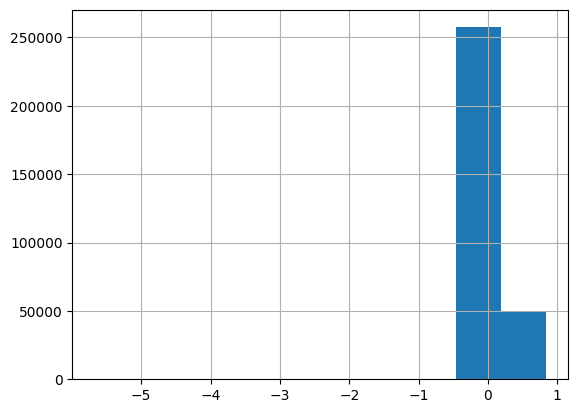

In [24]:
((viz_df_train["AMT_CREDIT"] - viz_df_train["AMT_GOODS_PRICE"])/viz_df_train["AMT_CREDIT"]).hist()

In [20]:
(viz_df_train["AMT_CREDIT"]%viz_df_train["AMT_ANNUITY"])


0         11389.5
1          8356.5
2             0.0
3         15817.5
4         10093.5
           ...   
307506     6678.0
307507     5517.0
307508    18126.0
307509     6417.0
307510    36472.5
Length: 307507, dtype: float64

In [22]:
loan_interest_rate = 0.1

In [23]:
loan_interest_rate / (loan_interest_rate+1)

0.09090909090909091

In [ ]:
# Anomalies / outliers in revenues ?

In [89]:
preprocess_train_df["AMT_INCOME_TOTAL_zscore"] = (preprocess_train_df["AMT_INCOME_TOTAL"] - preprocess_train_df["AMT_INCOME_TOTAL"].mean()) / preprocess_train_df["AMT_INCOME_TOTAL"].std()

In [91]:
preprocess_train_income_outliers = preprocess_train_df.loc[preprocess_train_df["AMT_INCOME_TOTAL_zscore"]>3,:]

In [94]:
preprocess_train_income_outliers["TARGET"].value_counts()[1]/(preprocess_train_income_outliers["TARGET"].value_counts()[0]+preprocess_train_income_outliers["TARGET"].value_counts()[1])

0.05286343612334802

In [95]:
preprocess_train_df["TARGET"].value_counts()[1]/(preprocess_train_df["TARGET"].value_counts()[0]+preprocess_train_df["TARGET"].value_counts()[1])

0.08072986956394489

In [75]:
viz_df_train["AMT_INCOME_TOTAL_zscore"] = (viz_df_train["AMT_INCOME_TOTAL"] - viz_df_train["AMT_INCOME_TOTAL"].mean()) / viz_df_train["AMT_INCOME_TOTAL"].std()

In [81]:
viz_df_test["AMT_INCOME_TOTAL_zscore"] = (viz_df_test["AMT_INCOME_TOTAL"] - viz_df_test["AMT_INCOME_TOTAL"].mean()) / viz_df_test["AMT_INCOME_TOTAL"].std()

<Axes: >

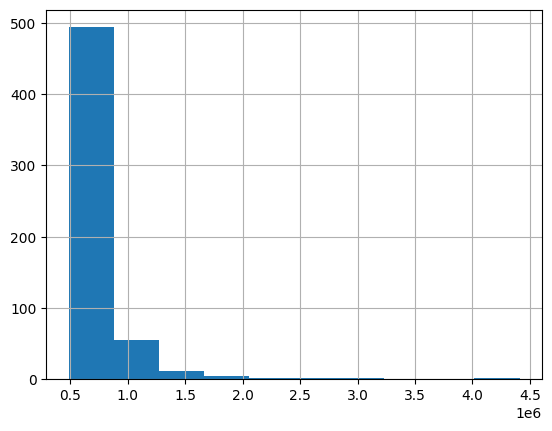

In [88]:
viz_df_test.loc[viz_df_test["AMT_INCOME_TOTAL_zscore"]>3,:]["AMT_INCOME_TOTAL"].hist()

In [99]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

In [100]:
clf = IsolationForest(contamination=0.05)
exp_df = preprocess_train_df.copy()
imputer = SimpleImputer(strategy="mean")
exp_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]] = imputer.fit_transform(exp_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
exp_df["Anomaly"] = clf.fit_predict(exp_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])

In [101]:
exp_df["Anomaly"].value_counts()


Anomaly
 1    292131
-1     15376
Name: count, dtype: int64

In [102]:
exp_df.loc[exp_df["Anomaly"] == -1,:]["TARGET"].value_counts()


TARGET
0    14659
1      717
Name: count, dtype: int64

In [85]:
viz_df_train.loc[viz_df_train["AMT_INCOME_TOTAL_zscore"]>3,:]

,SK_ID_CURR,AGE,TIME_CURRENT_JOB_YEARS,DAYS_BIRTH,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL_zscore
1504,101769,37,15.0,-13633,0,Higher education,-5536.0,NaN,Business Entity Type 3,1080000.0,180000.0,9000.0,180000.0,NaN,0.652924,0.456110,3.842715
1723,102015,51,NaN,-18636,1,Secondary / secondary special,NaN,NaN,XNA,1935000.0,269550.0,10534.5,225000.0,0.658977,0.268663,0.331251,7.448414
3371,103938,33,2.0,-12213,1,Higher education,-843.0,Managers,Housing,1350000.0,2410380.0,109053.0,2250000.0,NaN,0.724541,0.569149,4.981357
4603,105384,40,13.0,-14781,1,Higher education,-4768.0,Managers,Business Entity Type 3,1350000.0,405000.0,20250.0,405000.0,NaN,0.661593,0.725276,4.981357
5673,106637,32,1.0,-11901,0,Higher education,-546.0,Managers,Business Entity Type 3,967500.0,450000.0,30073.5,450000.0,0.697907,0.492086,0.454321,3.368281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304477,452764,42,2.0,-15532,1,Higher education,-953.0,Managers,Business Entity Type 3,2025000.0,935640.0,93487.5,900000.0,NaN,0.759875,0.676993,7.827961
305577,454039,57,11.0,-20986,0,Higher education,-4237.0,Managers,Business Entity Type 3,1215000.0,1264738.5,67513.5,1138500.0,0.798563,0.697679,0.260856,4.412036
306028,454569,35,0.0,-12947,0,Higher education,-316.0,Managers,Business Entity Type 3,1350000.0,1575000.0,78750.0,1575000.0,0.490475,0.772679,0.529890,4.981357
306179,454746,38,4.0,-14111,0,Higher education,-1487.0,Managers,Business Entity Type 3,949500.0,735579.0,35518.5,585000.0,0.441853,0.539413,0.526295,3.292371
